### 데이터 전처리 후 분석하기
* 가격 변동
* 평균가격 변동률
* 절대가격 변동률

In [2]:
import pandas as pd

# 원본 데이터
bangkok_26 = pd.read_csv("/", encoding='utf-8')
bangkok_27 = pd.read_csv("/", encoding='utf-8')
danang_26 = pd.read_csv("/", encoding='utf-8')
danang_27 = pd.read_csv("/", encoding='utf-8')
osaka_26 = pd.read_csv("/", encoding='utf-8')
osaka_27 = pd.read_csv("/", encoding='utf-8')

In [186]:
# 필요하지 않은 컬럼 삭제
# a = bangkok_26.drop('Unnamed: 0', axis=1)
# b = danang_26.drop('Unnamed: 0', axis=1)

In [187]:
bangkok_26.tail()

,항공사,출발시간,출발공항,도착시간,도착공항,비행방식,소요시간,편도/왕복,가격,추출시간,편명
1965,대한항공,17:20,ICN,21:30,BKK,직항,06시간 10분,편도,546200,2024-01-22 10:00:00,KE 651
1966,대한항공,19:05,ICN,23:20,BKK,직항,06시간 15분,편도,546200,2024-01-22 10:00:00,KE 653
1967,대한항공,20:10,ICN,00:20,BKK,직항,06시간 10분,편도,582200,2024-01-22 10:00:00,KE 673
1968,아시아나,18:05,ICN,22:00,BKK,직항,05시간 55분,편도,662600,2024-01-22 10:00:00,OZ 741
1969,대한항공,09:15,ICN,13:15,BKK,직항,06시간 00분,편도,690200,2024-01-22 10:00:00,KE 657


In [3]:
bangkok_26.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   항공사     1970 non-null   object
 1   출발시간    1970 non-null   object
 2   출발공항    1970 non-null   object
 3   도착시간    1970 non-null   object
 4   도착공항    1970 non-null   object
 5   비행방식    1970 non-null   object
 6   소요시간    1970 non-null   object
 7   편도/왕복   1970 non-null   object
 8   가격      1970 non-null   int64 
 9   추출시간    1970 non-null   object
 10  편명      1970 non-null   object
dtypes: int64(1), object(10)
memory usage: 169.4+ KB


### 분석을 위한 데이터 형식 변경

In [188]:
import datetime

# datetime 형식 변환
bangkok_26['추출시간'] = pd.to_datetime(bangkok_26['추출시간'])
bangkok_27['추출시간'] = pd.to_datetime(bangkok_27['추출시간'])

danang_26['추출시간'] = pd.to_datetime(danang_26['추출시간'])
danang_27['추출시간'] = pd.to_datetime(danang_27['추출시간'])

osaka_26['추출시간'] = pd.to_datetime(osaka_26['추출시간'])
osaka_27['추출시간'] = pd.to_datetime(osaka_27['추출시간'])

In [189]:
# 날짜 구분 컬럼 추가
bangkok_26['날짜'] = bangkok_26['추출시간'].dt.date
bangkok_27['날짜'] = bangkok_27['추출시간'].dt.date

danang_26['날짜'] = danang_26['추출시간'].dt.date
danang_27['날짜'] = danang_27['추출시간'].dt.date

osaka_26['날짜'] = osaka_26['추출시간'].dt.date
osaka_27['날짜'] = osaka_27['추출시간'].dt.date

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# 편명, 추출시간을 기준으로 정렬 데이터
bangkok_26_sorted = bangkok_26.sort_values(by=['편명', '추출시간'])
bangkok_27_sorted = bangkok_27.sort_values(by=['편명', '추출시간'])

danang_26_sorted = danang_26.sort_values(by=['편명', '추출시간'])
danang_27_sorted = danang_27.sort_values(by=['편명', '추출시간'])

osaka_26_sorted = osaka_26.sort_values(by=['편명', '추출시간'])
osaka_27_sorted = osaka_27.sort_values(by=['편명', '추출시간'])

### 방콕 26일 편명별 시간에 따른 가격 변동 추이

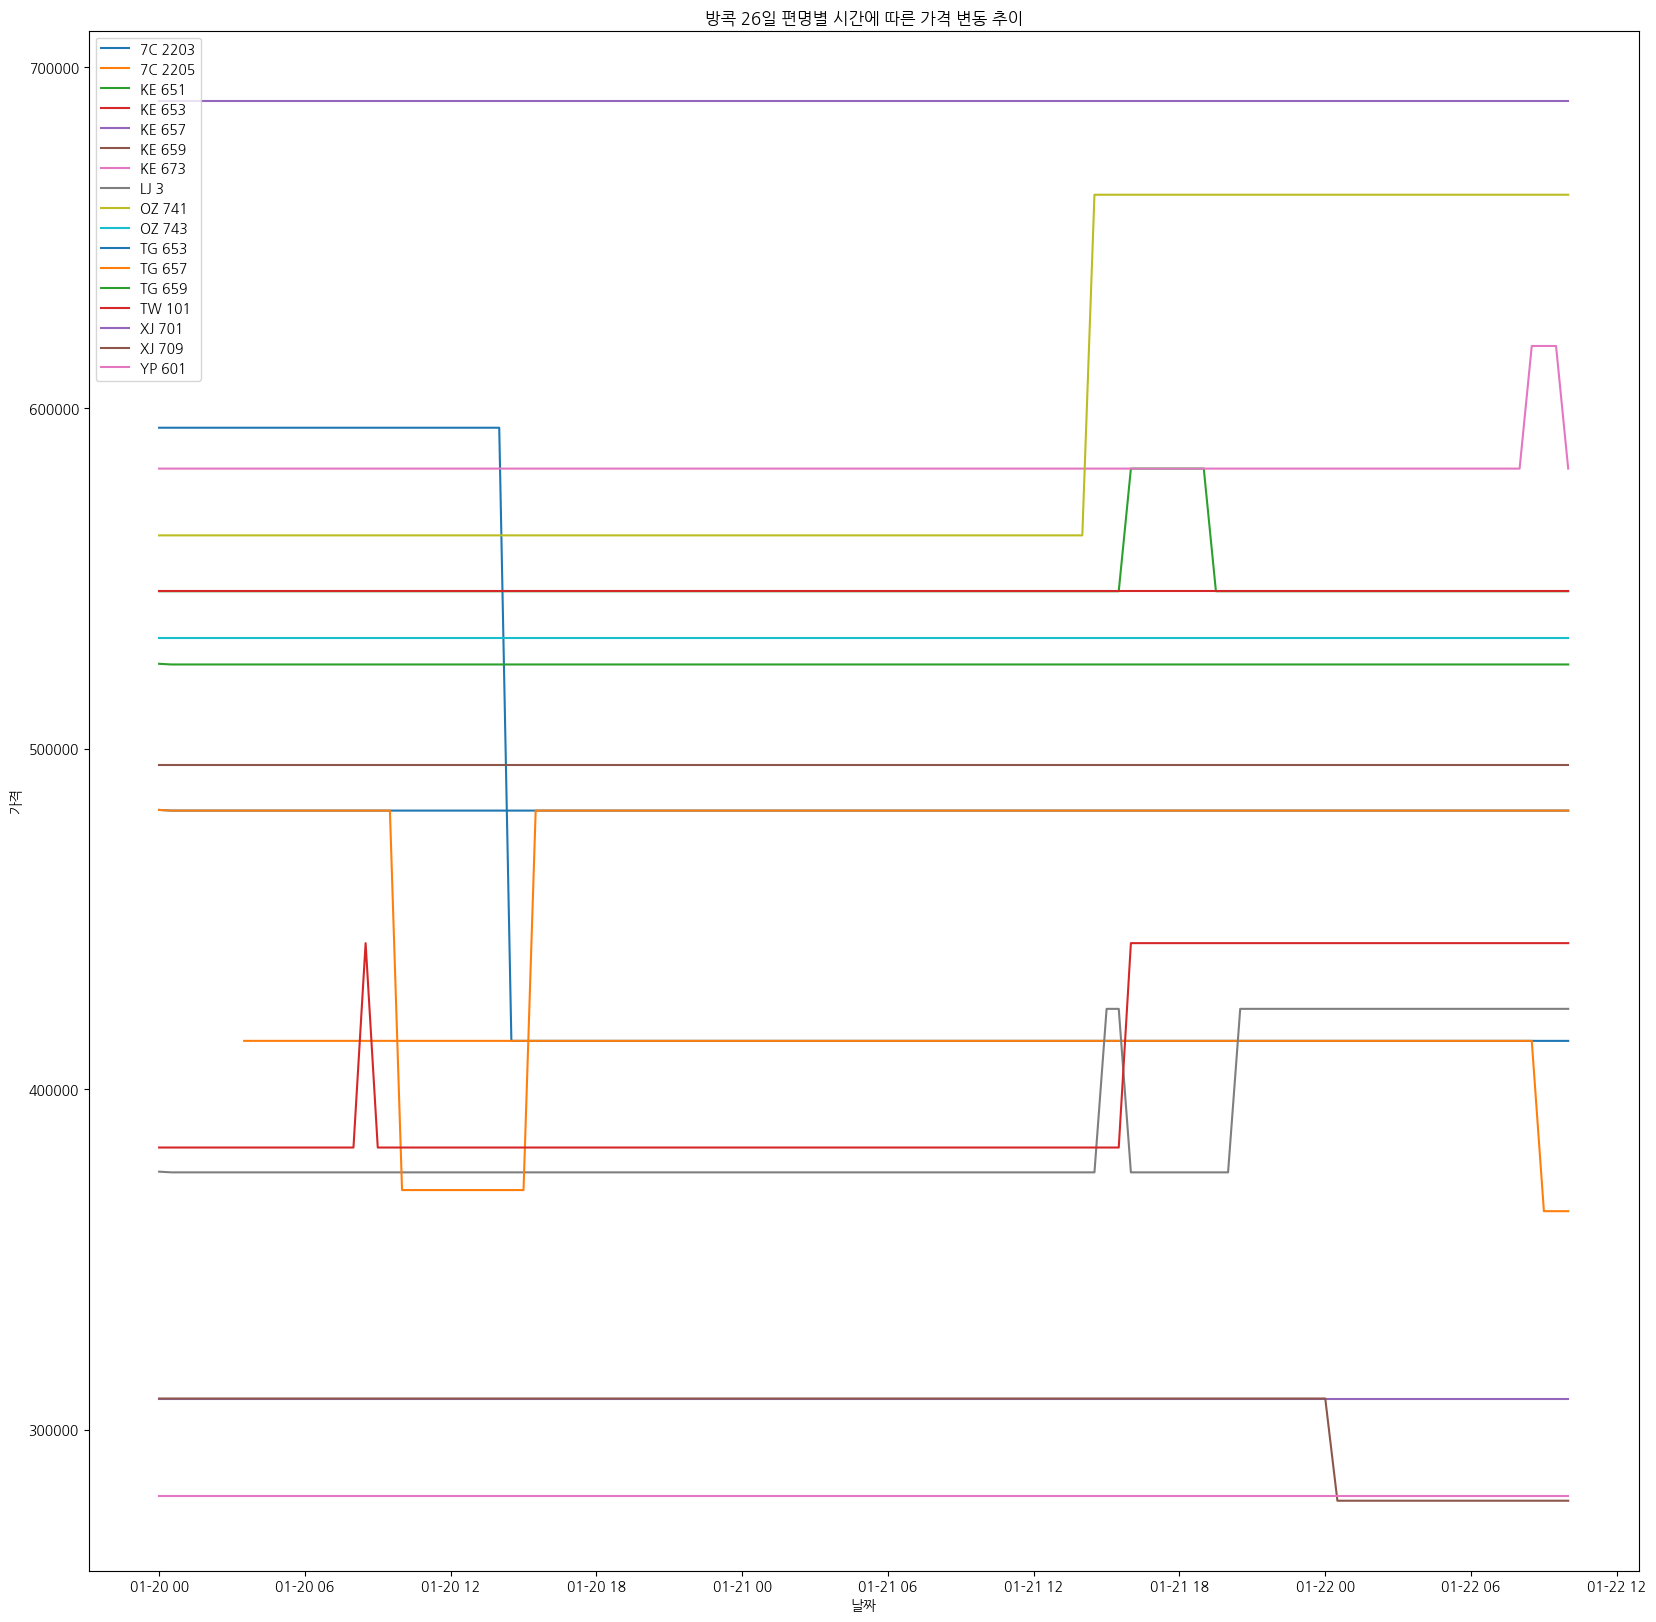

In [191]:
import koreanize_matplotlib
grouped_number = bangkok_26.groupby('편명')
grouped_date = bangkok_26.groupby('날짜')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('방콕 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

### 방콕 27일 편명별 시간에 따른 가격 변동 추이

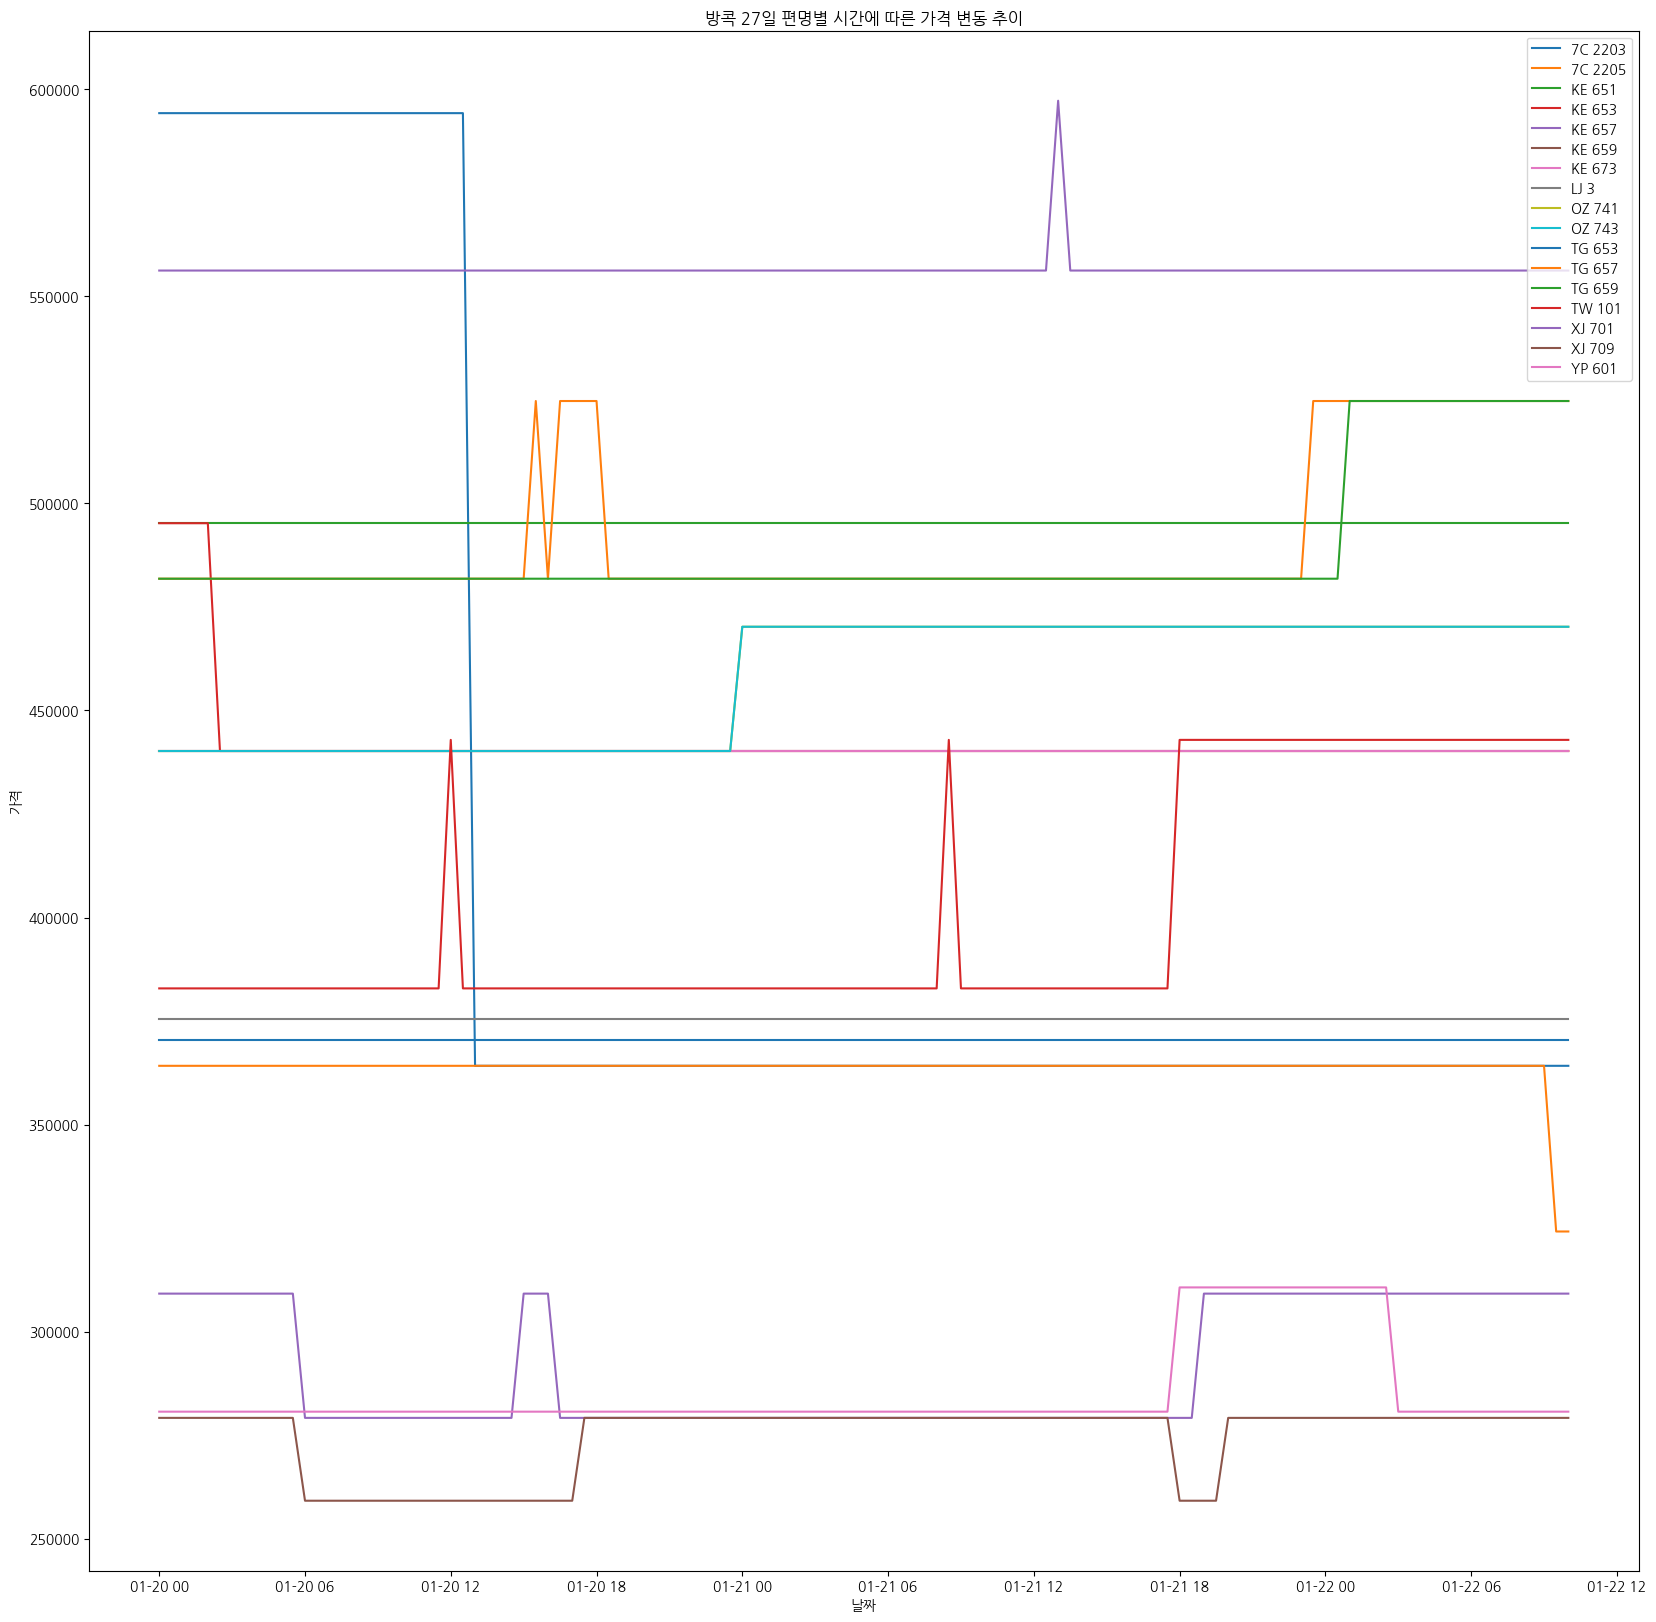

In [194]:
import koreanize_matplotlib
grouped_number = bangkok_27_sorted.groupby('편명')
grouped_date = bangkok_27_sorted.groupby('날짜')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('방콕 27일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

### 다낭 26일 편명별 시간에 따른 가격 변동 추이

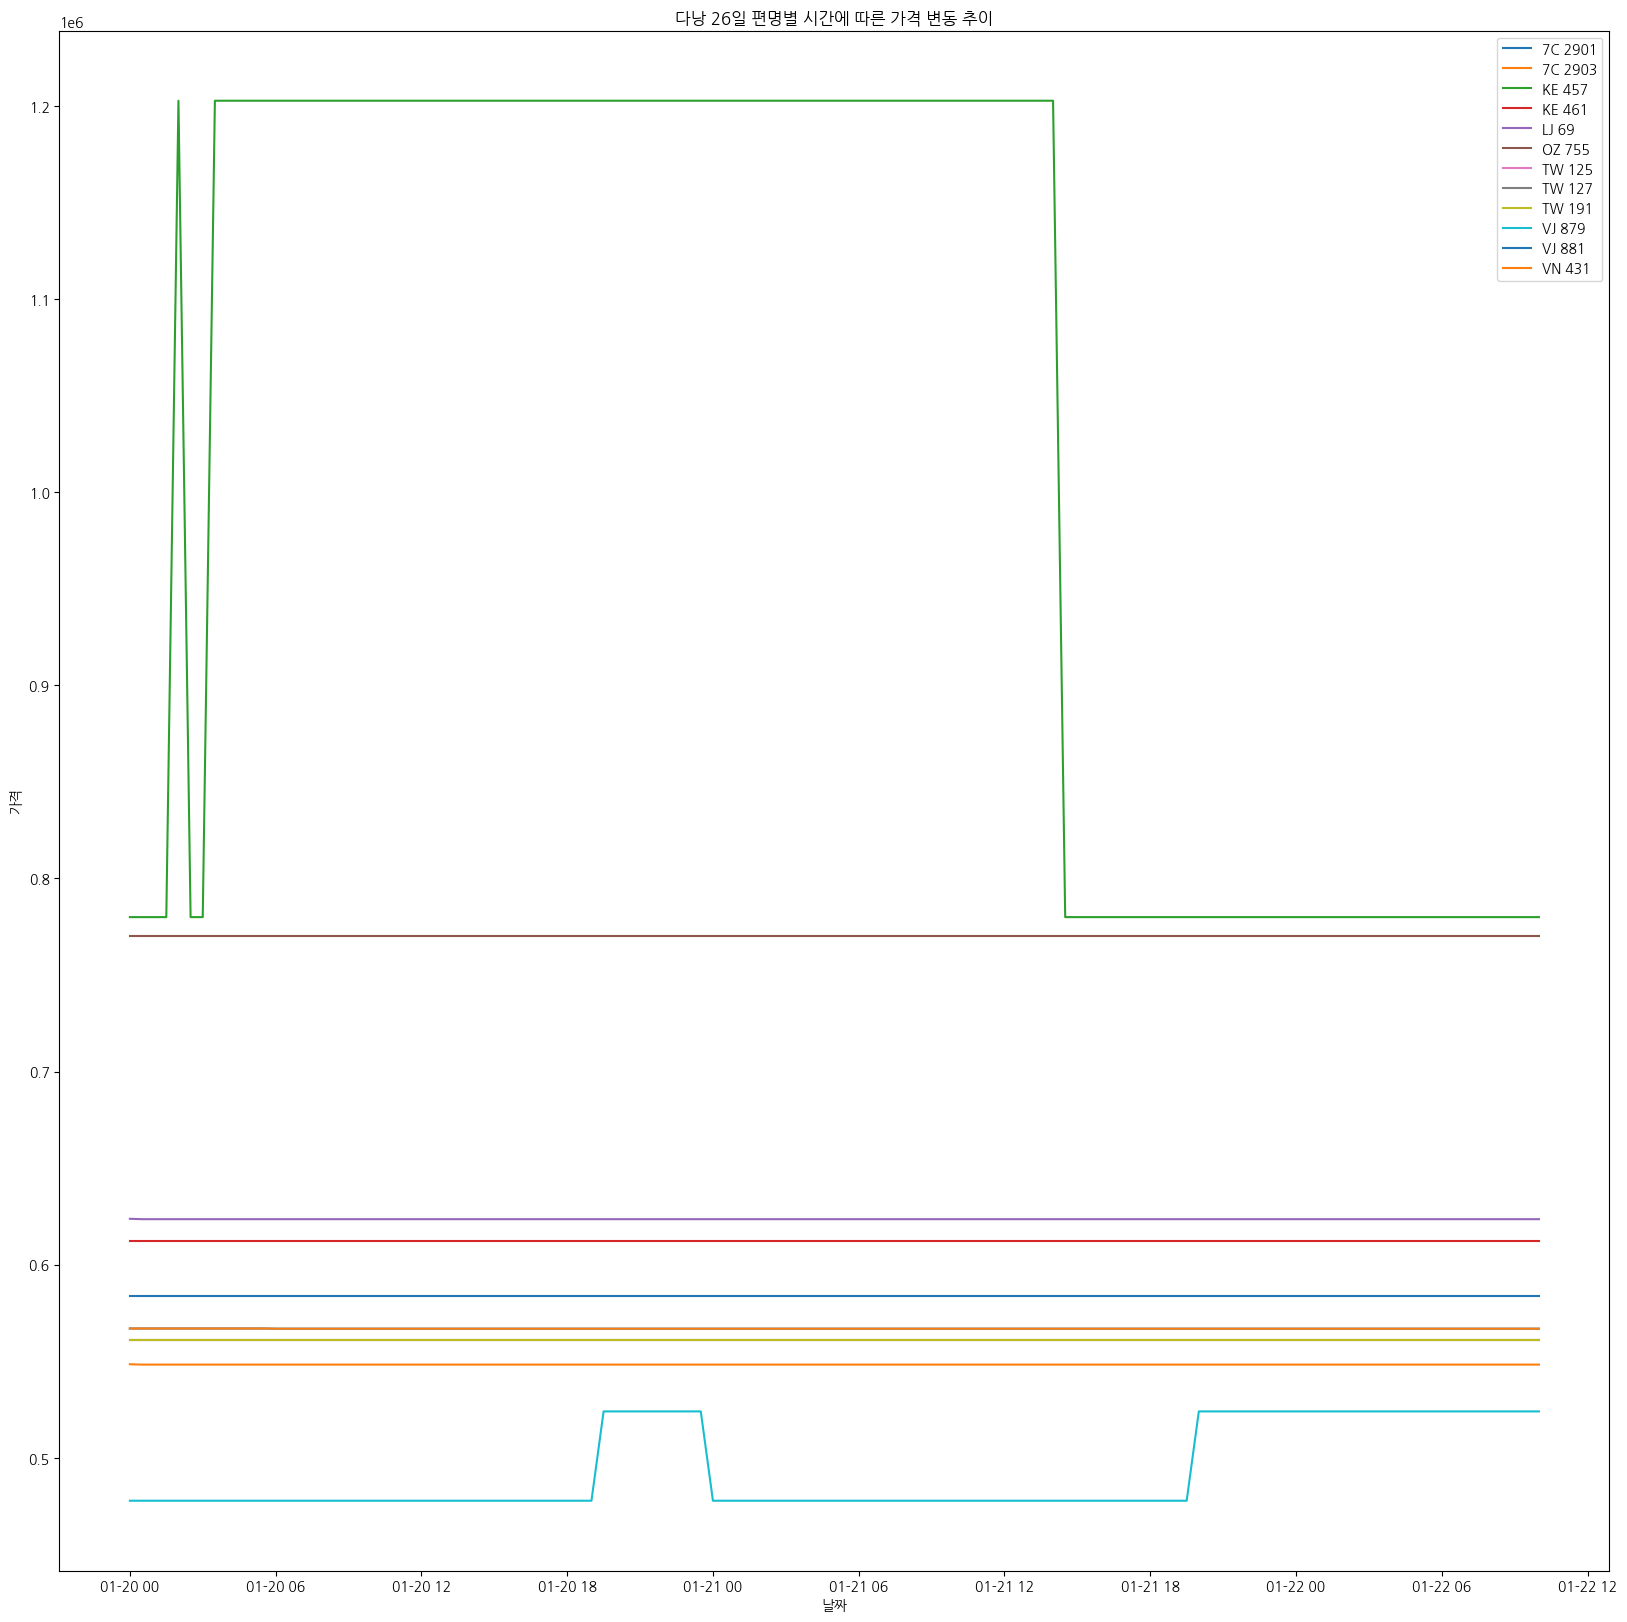

In [193]:
import koreanize_matplotlib
grouped_number = danang_26_sorted.groupby('편명')
grouped_date = danang_26_sorted.groupby('날짜')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('다낭 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

### 다낭 27일 편명별 시간에 따른 가격 변동 추이

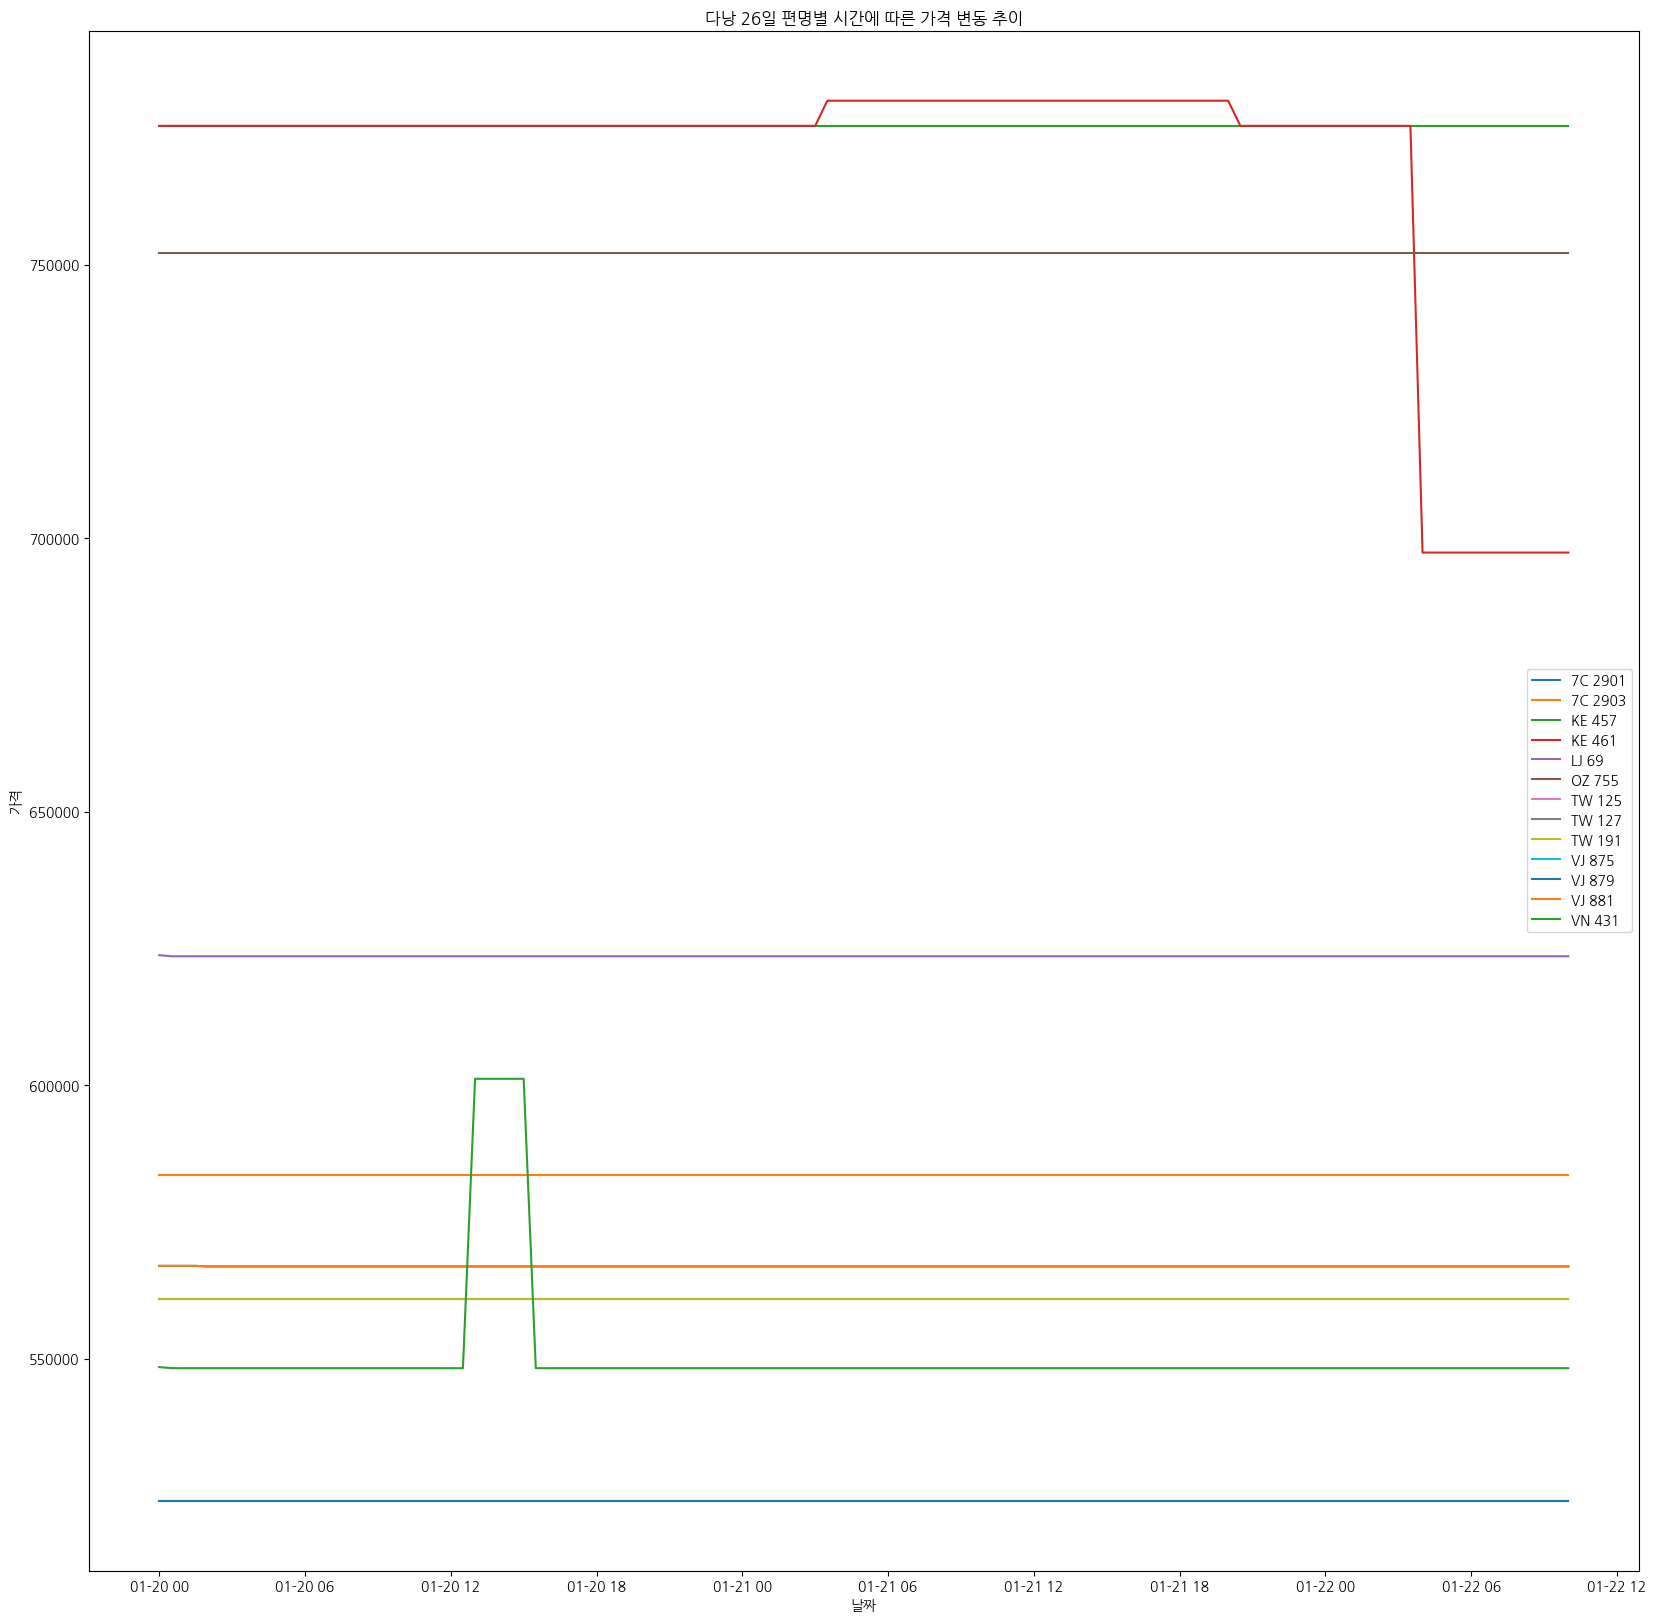

In [195]:
import koreanize_matplotlib
grouped_number = danang_27_sorted.groupby('편명')
grouped_date = danang_27_sorted.groupby('날짜')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('다낭 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

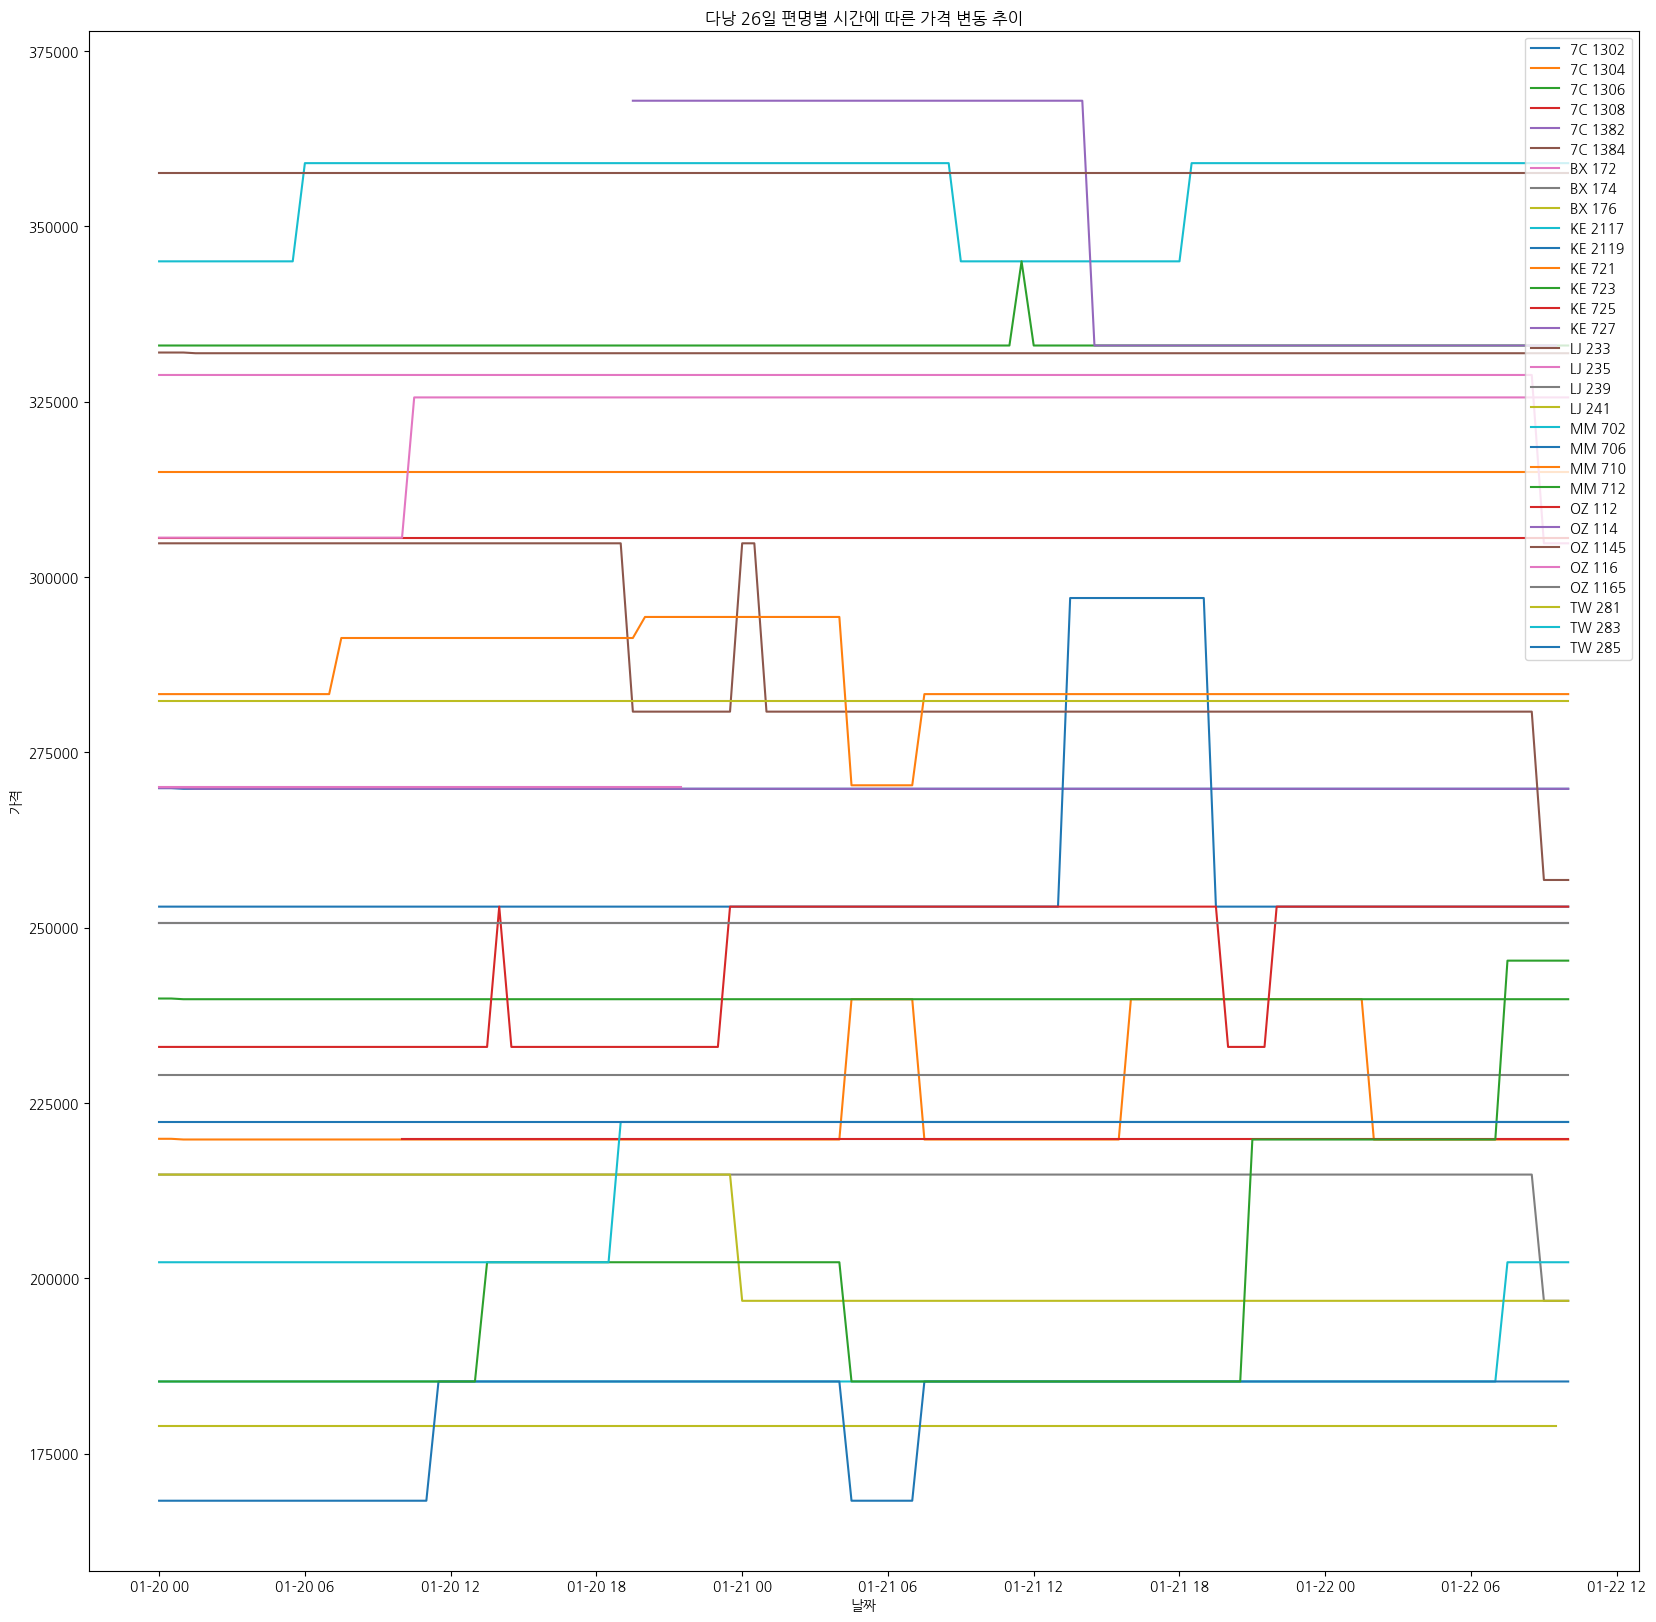

In [196]:
import koreanize_matplotlib
grouped_number = osaka_26_sorted.groupby('편명')
grouped_date = osaka_26_sorted.groupby('날짜')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('다낭 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

### 전체 데이터 가격 변동 추이

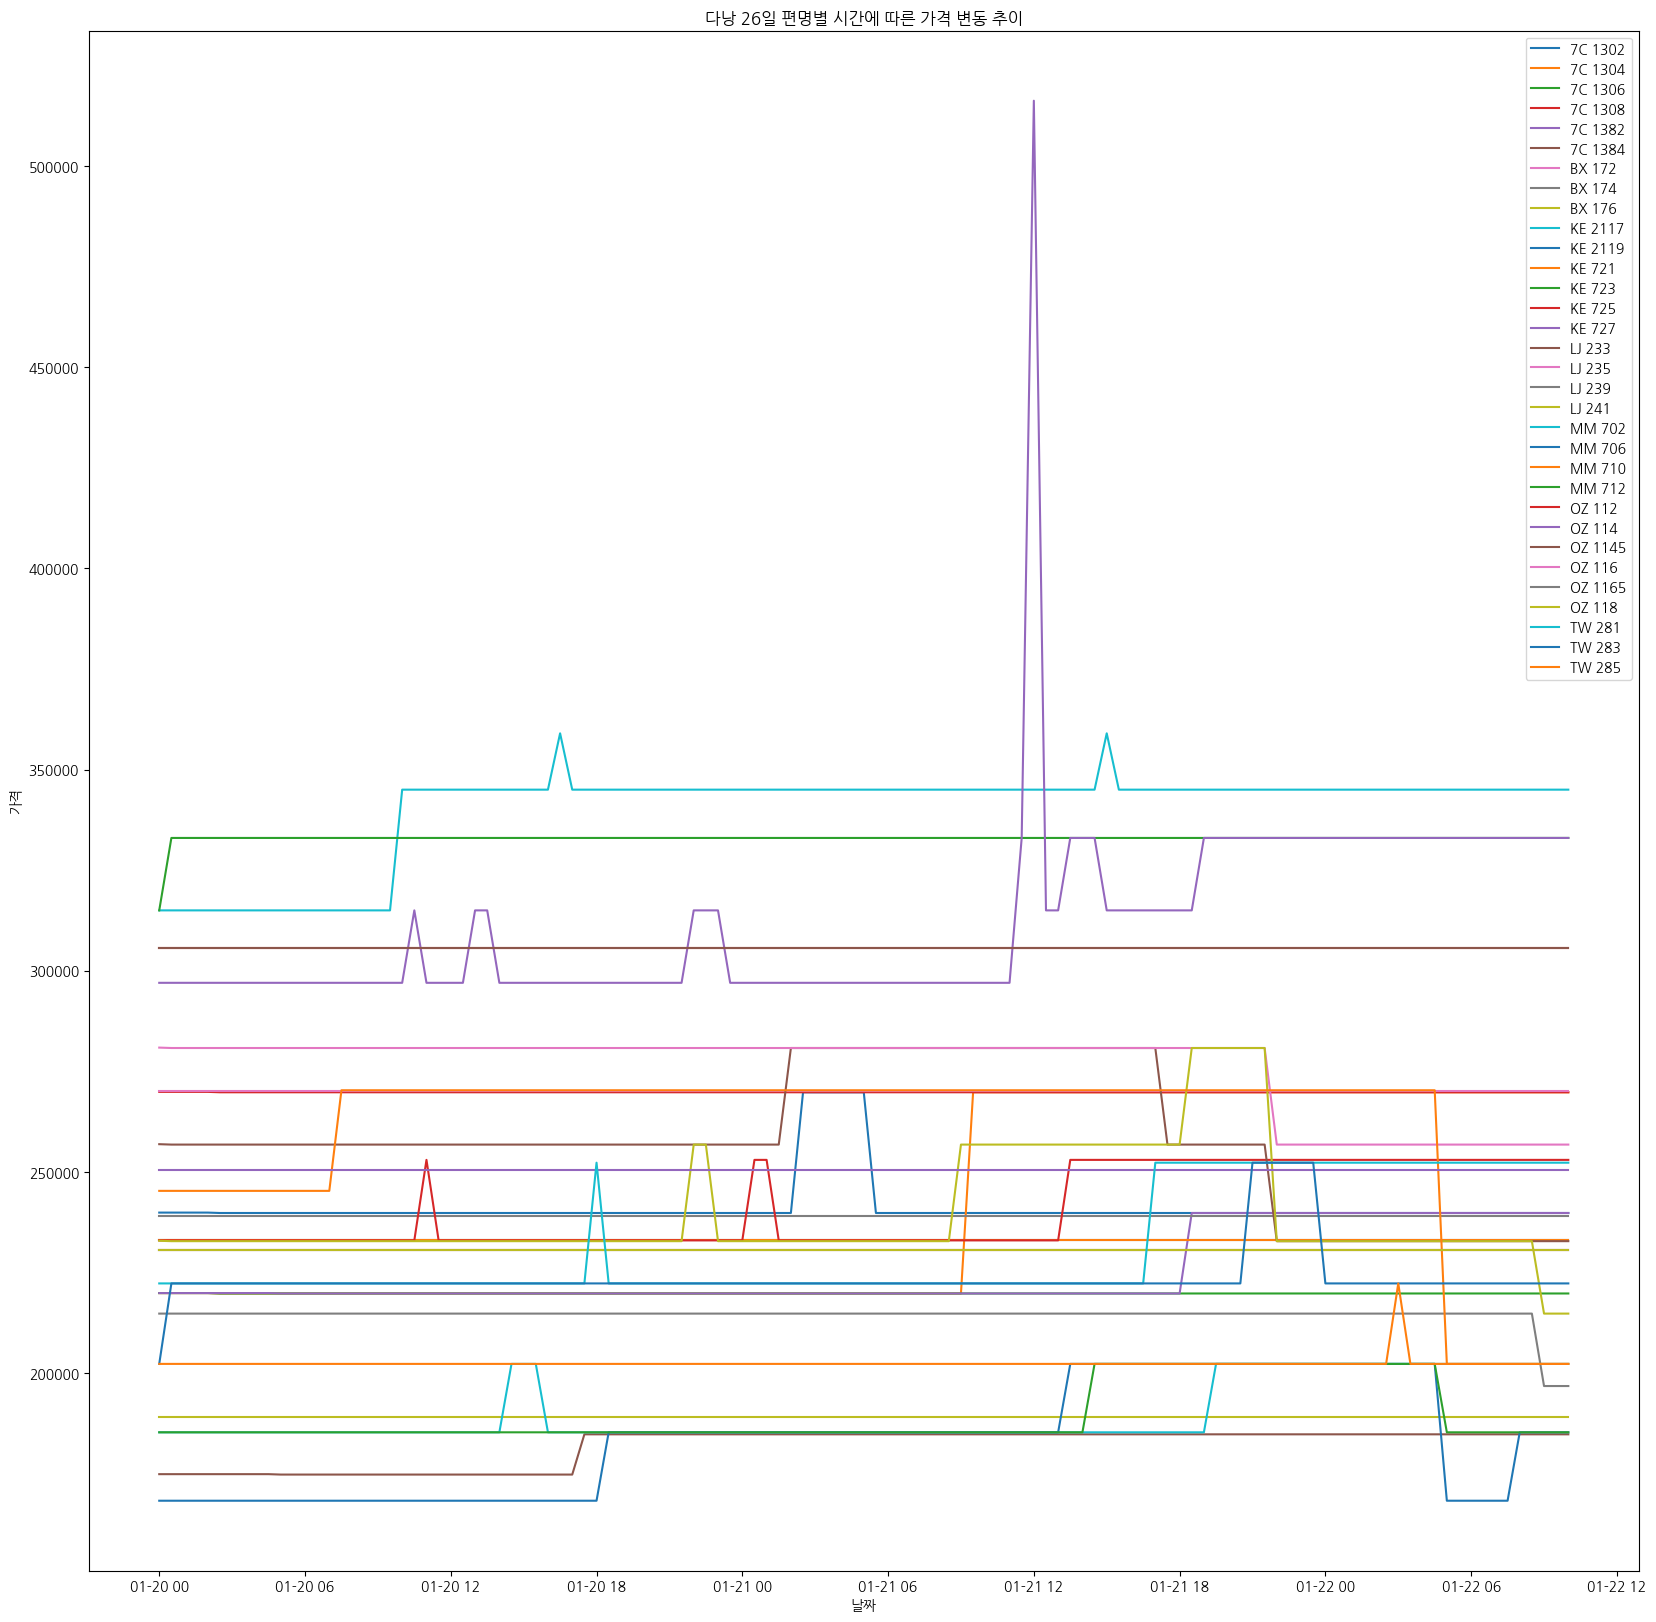

In [197]:
import koreanize_matplotlib
grouped_number = osaka_27_sorted.groupby('편명')
grouped_date = osaka_27_sorted.groupby('날짜')

plt.figure(figsize=(20,20))
for name, group in grouped_number:
    plt.plot(group['추출시간'], group['가격'], label=name)

plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('다낭 26일 편명별 시간에 따른 가격 변동 추이')
plt.legend()
plt.show()

### 결측치 제거

In [201]:
len(bangkok_26['편명'].unique())

17

In [200]:
len(bangkok_27['편명'].unique())

17

In [216]:
len(osaka_26_sorted['편명'].unique())

31

In [217]:
grouped_number = osaka_26_sorted.groupby('편명')

In [212]:
grouped_number.head(20)

,항공사,출발시간,출발공항,도착시간,도착공항,비행방식,소요시간,편도/왕복,가격,추출시간,편명,날짜
20,제주항공,09:10,ICN,11:00,KIX,직항,01시간 50분,편도,239900,2024-01-20 00:00:00,7C 1302,2024-01-20
52,제주항공,09:10,ICN,11:00,KIX,직항,01시간 50분,편도,239900,2024-01-20 00:30:00,7C 1302,2024-01-20
84,제주항공,09:10,ICN,11:00,KIX,직항,01시간 50분,편도,239900,2024-01-20 01:00:00,7C 1302,2024-01-20
116,제주항공,09:10,ICN,11:00,KIX,직항,01시간 50분,편도,239900,2024-01-20 01:30:00,7C 1302,2024-01-20
148,제주항공,09:10,ICN,11:00,KIX,직항,01시간 50분,편도,239900,2024-01-20 02:00:00,7C 1302,2024-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...
485,티웨이항공,14:40,ICN,16:30,KIX,직항,01시간 50분,편도,202300,2024-01-20 07:30:00,TW 285,2024-01-20
517,티웨이항공,14:40,ICN,16:30,KIX,직항,01시간 50분,편도,202300,2024-01-20 08:00:00,TW 285,2024-01-20
549,티웨이항공,14:40,ICN,16:30,KIX,직항,01시간 50분,편도,202300,2024-01-20 08:30:00,TW 285,2024-01-20
581,티웨이항공,14:40,ICN,16:30,KIX,직항,01시간 50분,편도,202300,2024-01-20 09:00:00,TW 285,2024-01-20


In [218]:
len(grouped_number['추출시간'])

31

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_google = '/'
google_data = pd.read_csv(file_path_google)

In [32]:
google_data['추출시간'] = pd.to_datetime(google_data['추출시간'])
google_data['날짜'] = pd.to_datetime(google_data['추출시간']).dt.date

In [33]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   항공사     2016 non-null   object        
 1   출발시간    2016 non-null   object        
 2   출발공항    2016 non-null   object        
 3   도착시간    2016 non-null   object        
 4   도착공항    2016 non-null   object        
 5   비행방식    2016 non-null   object        
 6   소요시간    2016 non-null   object        
 7   편도/왕복   2016 non-null   object        
 8   가격      2016 non-null   int64         
 9   추출시간    2016 non-null   datetime64[ns]
 10  편명      2016 non-null   object        
 11  비행일자    2016 non-null   object        
 12  사이트     2016 non-null   object        
 13  날짜      2016 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 220.6+ KB


### 변동률 컬럼 추가하기

In [34]:
price_trend_google_original = google_data.groupby(['추출시간', '편명', '날짜'])['가격'].first().reset_index()

# Normalizing the price changes for each flight
price_trend_google_original['변동률'] = price_trend_google_original.groupby('편명')['가격'].diff().fillna(0)


In [5]:
price_trend_google_original.head(50)

,추출시간,편명,날짜,가격,변동률
0,2024-01-20 00:00:00,KE 651,2024-01-20,546200,0.0
1,2024-01-20 00:00:00,KE 653,2024-01-20,546200,0.0
2,2024-01-20 00:00:00,KE 657,2024-01-20,690200,0.0
3,2024-01-20 00:00:00,KE 659,2024-01-20,495200,0.0
4,2024-01-20 00:00:00,KE 673,2024-01-20,582200,0.0
5,2024-01-20 00:00:00,LJ 3,2024-01-20,375800,0.0
6,2024-01-20 00:00:00,OZ 741,2024-01-20,562600,0.0
7,2024-01-20 00:00:00,OZ 743,2024-01-20,532600,0.0
8,2024-01-20 00:00:00,TG 653,2024-01-20,482000,0.0
9,2024-01-20 00:00:00,TG 659,2024-01-20,524900,0.0


### 분석을 위한 데이터 형식 변경하기

In [273]:
import time
from datetime import datetime
import pandas as pd

google_data['날짜'] = pd.to_datetime(google_data['추출시간']).dt.date

In [ ]:
import time
from datetime import datetime
import pandas as pd

google_data['날짜'] = pd.to_datetime(google_data['추출시간']).dt.date

In [ ]:
import pandas as pd

google_data['날짜'] = pd.to_datetime(google_data['추출시간']).dt.date

### 이상치, 결측치 제거한 후의 가격 변동 추이(네이버 다낭 26일)

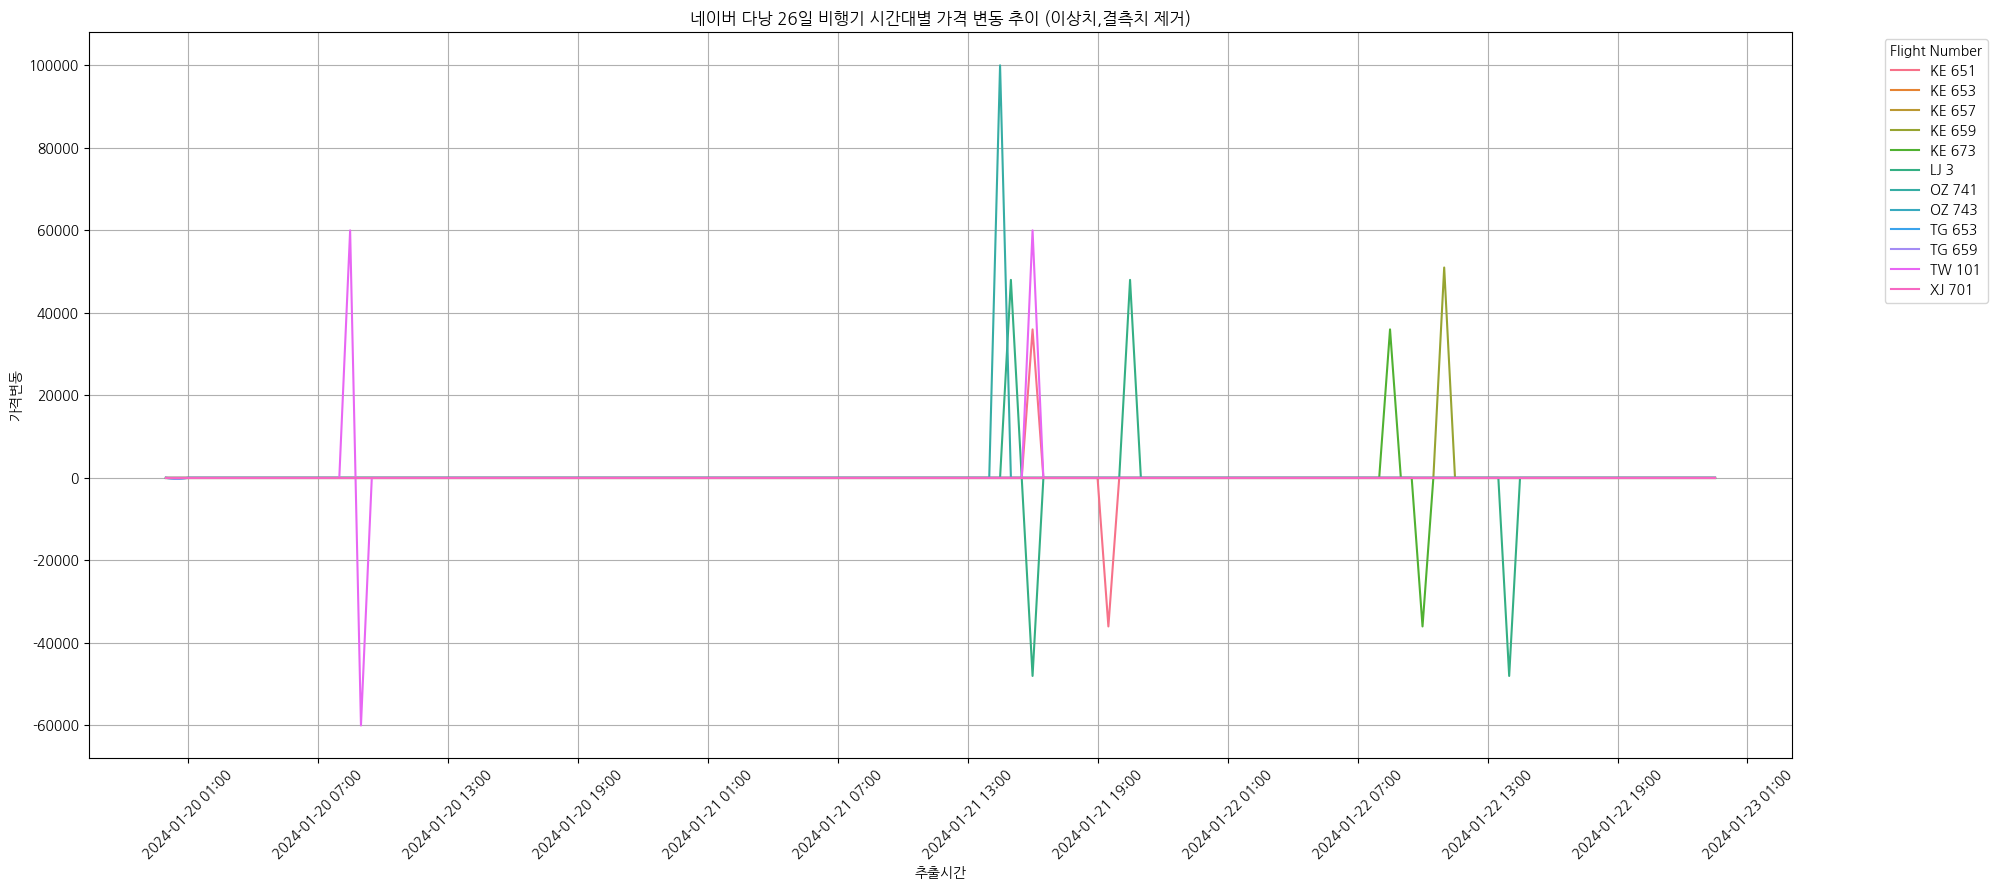

In [16]:
import koreanize_matplotlib
import matplotlib.dates as mdates
from datetime import date

# 추출시간에 따른 각각 파일 병 변동률 보는 코드
plt.figure(figsize=(20, 9))
ax = sns.lineplot(data=price_trend_google_original, x='추출시간', y='변동률', hue='편명')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Setting 6 hours interval for x-axis labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.title('네이버 다낭 26일 비행기 시간대별 가격 변동 추이 (이상치,결측치 제거)')
plt.xlabel('추출시간')
plt.ylabel('가격변동')
plt.xticks(rotation=45)
plt.legend(title='Flight Number', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
price_trend_google_original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   추출시간    1728 non-null   datetime64[ns]
 1   편명      1728 non-null   object        
 2   날짜      1728 non-null   object        
 3   가격      1728 non-null   int64         
 4   변동률     1728 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 67.6+ KB


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import time

# 추출시간 datetime으로 변환
price_trend_google_original['추출시간'] = pd.to_datetime(price_trend_google_original['추출시간'])

# 날짜별로 분류
data_2024_01_20 = price_trend_google_original[price_trend_google_original['날짜'] == date(2024, 1, 20)]
data_2024_01_21 = price_trend_google_original[price_trend_google_original['날짜'] == date(2024, 1, 21)]
data_2024_01_22 = price_trend_google_original[price_trend_google_original['날짜'] == date(2024, 1, 22)]

# 추출시간 datetime으로 변환
data_2024_01_20['추출시간'] = pd.to_datetime(data_2024_01_20['추출시간'])
data_2024_01_21['추출시간'] = pd.to_datetime(data_2024_01_21['추출시간'])
data_2024_01_22['추출시간'] = pd.to_datetime(data_2024_01_22['추출시간'])

# 시간별 분류
data_2024_01_20['시간'] = data_2024_01_20['추출시간'].dt.strftime('%H:%M')
data_2024_01_21['시간'] = data_2024_01_21['추출시간'].dt.strftime('%H:%M')
data_2024_01_22['시간'] = data_2024_01_22['추출시간'].dt.strftime('%H:%M')

data_2024_01_22.info()


<class 'pandas.core.frame.DataFrame'>
Index: 672 entries, 1344 to 2015
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   추출시간    672 non-null    datetime64[ns]
 1   편명      672 non-null    object        
 2   날짜      672 non-null    object        
 3   가격      672 non-null    int64         
 4   변동률     672 non-null    float64       
 5   시간      672 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 36.8+ KB


/tmp/ipykernel_23713/1335465452.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024_01_20['추출시간'] = pd.to_datetime(data_2024_01_20['추출시간'])
/tmp/ipykernel_23713/1335465452.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024_01_21['추출시간'] = pd.to_datetime(data_2024_01_21['추출시간'])
/tmp/ipykernel_23713/1335465452.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

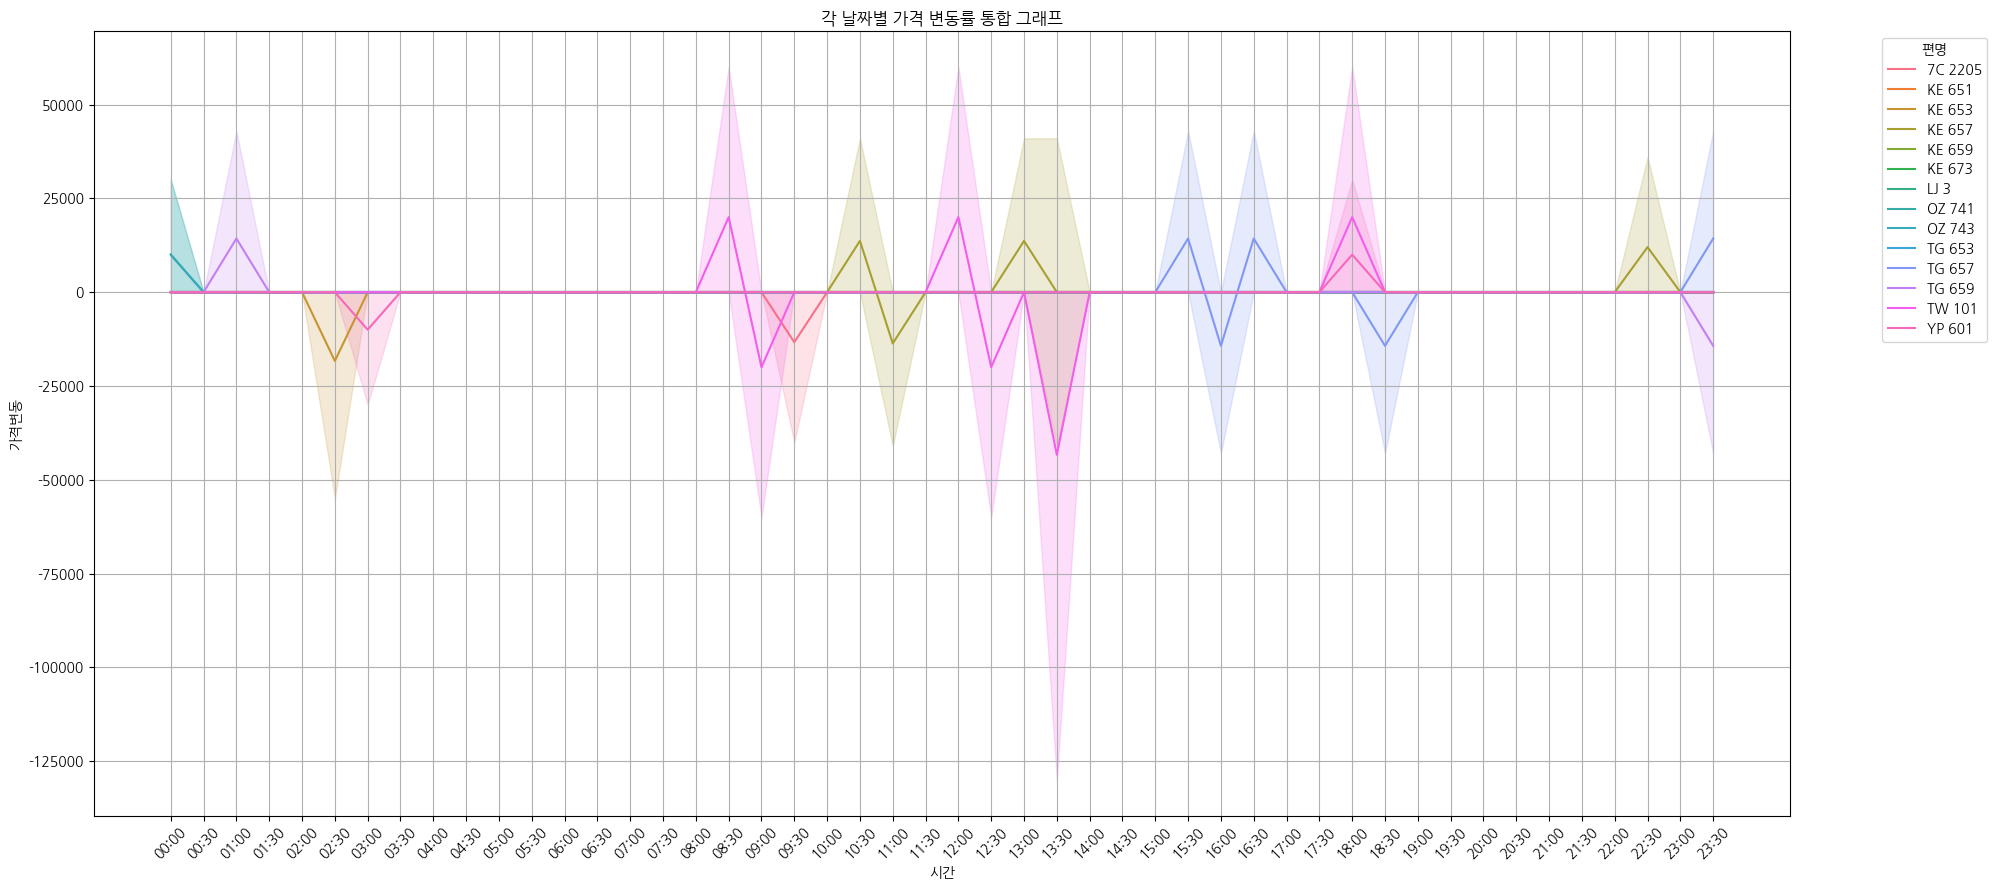

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 각 날짜 데이터를 하나의 데이터프레임으로 합치기
combined_data = pd.concat([data_2024_01_20, data_2024_01_21, data_2024_01_22])

plt.figure(figsize=(20, 9))

# '시간'을 x축으로 사용하여 그래프 그리기
sns.lineplot(data=combined_data, x='시간', y='변동률', hue='편명')

plt.title('각 날짜별 가격 변동률 통합 그래프')
plt.xlabel('시간')
plt.ylabel('가격변동')
plt.xticks(rotation=45)
plt.legend(title='편명', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


### 파일 불러오기

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the file after the code execution state reset
file_path_google = '/'
google_data = pd.read_csv(file_path_google)

### 평균가격 형성 변동

In [80]:
# Extracting the time component from '추출시간'
google_data['추출시간'] = pd.to_datetime(google_data['추출시간']).dt.time

# Grouping by '추출시간' and calculating the mean price
avg_price = google_data.groupby('추출시간')['가격'].mean().reset_index()

# Convert '추출시간' to string for plotting
avg_price['추출시간'] = avg_price['추출시간'].astype(str)


In [29]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   항공사     4176 non-null   object
 1   출발시간    4176 non-null   object
 2   출발공항    4176 non-null   object
 3   도착시간    4176 non-null   object
 4   도착공항    4176 non-null   object
 5   비행방식    4176 non-null   object
 6   소요시간    4176 non-null   object
 7   편도/왕복   4176 non-null   object
 8   가격      4176 non-null   int64 
 9   추출시간    4176 non-null   object
 10  편명      4176 non-null   object
 11  비행일자    4176 non-null   object
 12  사이트     4176 non-null   object
dtypes: int64(1), object(12)
memory usage: 424.2+ KB


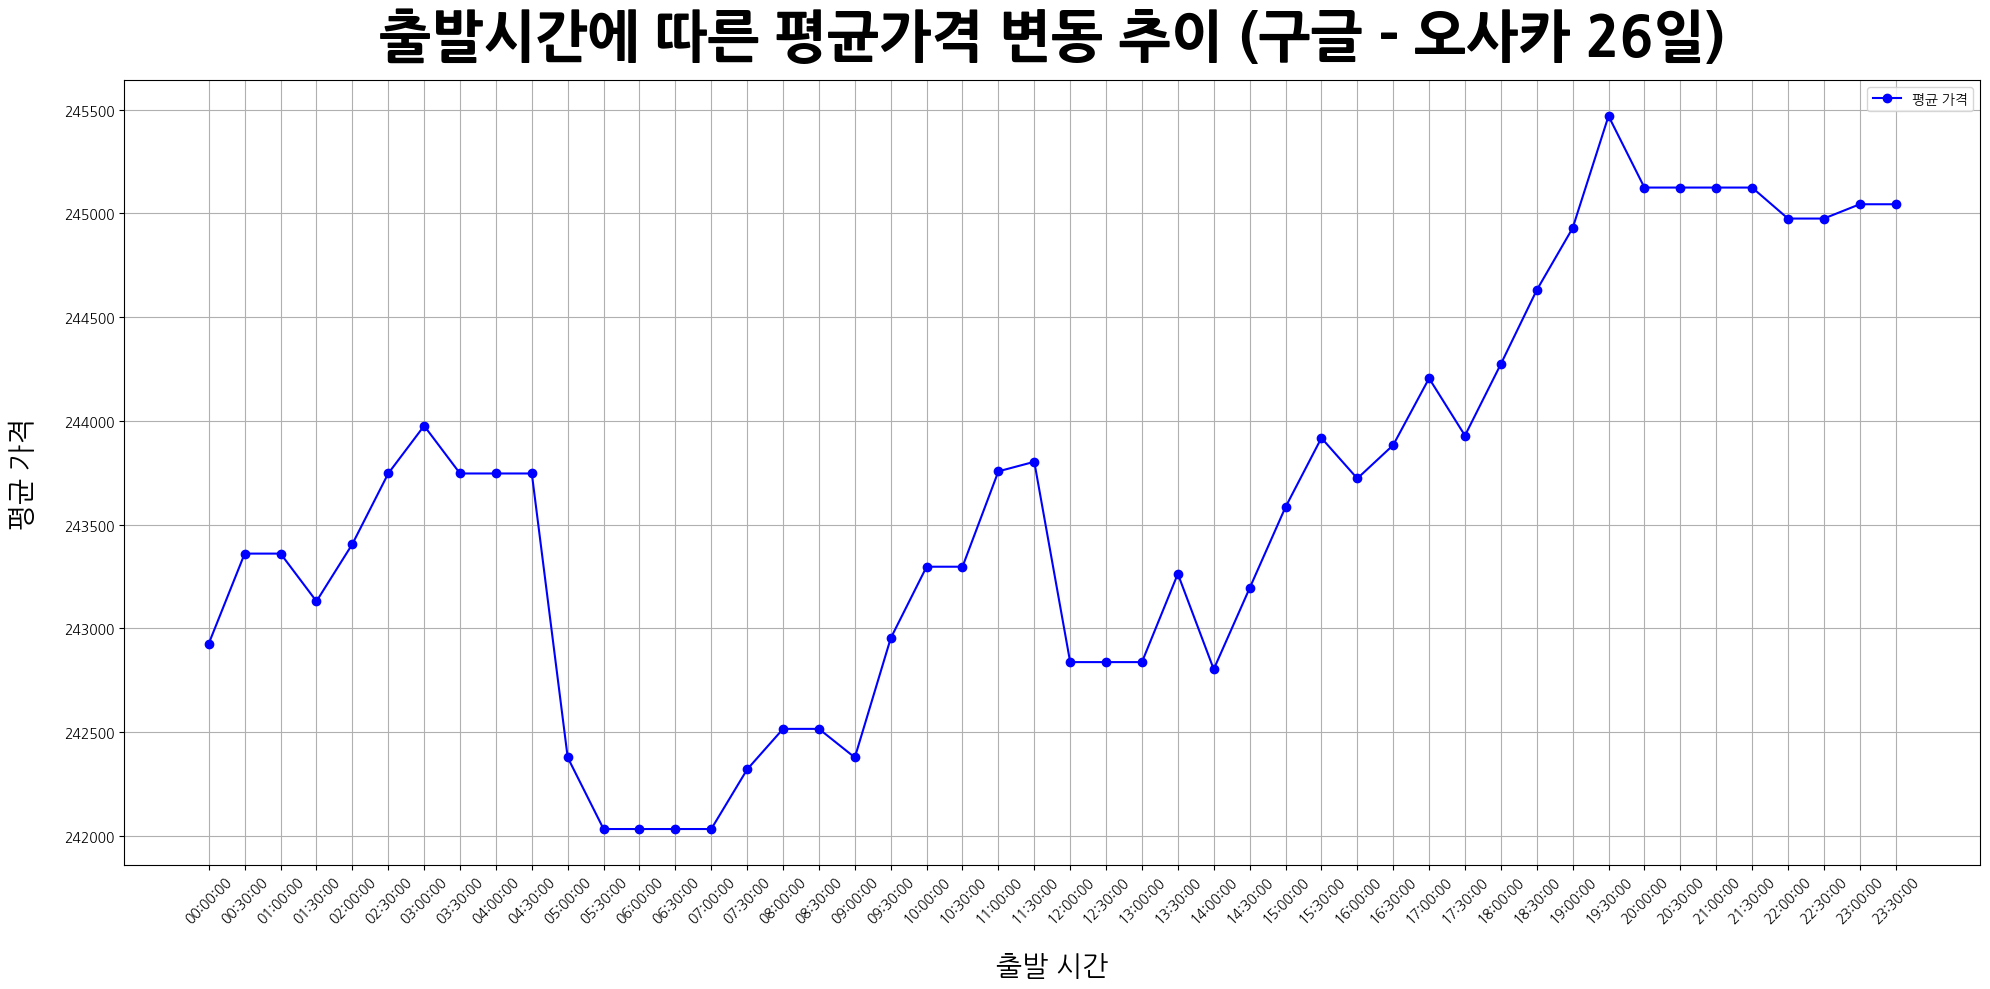

In [82]:
import koreanize_matplotlib
import matplotlib.pyplot as plt

# 평균 가격 변동 추이 그래프
plt.figure(figsize=(20, 10))
plt.plot(avg_price['추출시간'], avg_price['가격'], marker='o', label='평균 가격', color='blue')
plt.xticks(rotation=45)
plt.title('출발시간에 따른 평균가격 변동 추이 (구글 - 오사카 26일)', fontsize= 40, fontweight='bold', pad = 20)
plt.xlabel('출발 시간', fontsize= 20, labelpad=20)
plt.ylabel('평균 가격', fontsize= 20, labelpad=20)
plt.grid(True)
plt.legend()
plt.tight_layout()


### 절대가격 변동률 계산하기

In [83]:
# google_data['추출시간'] = pd.to_datetime(google_data['추출시간']).dt.time

# 각 행별로 이전 행과의 가격 차이를 계산
google_data['가격_변동'] = google_data['가격'].diff()

# 첫 번째 행은 NaN이므로 이를 0으로 설정
google_data['가격_변동'].fillna(0, inplace=True)

# 각 추출시간에 대한 평균 가격 변동률 계산
avg_price_change = google_data.groupby('추출시간')['가격_변동'].mean().reset_index()

# '추출시간'을 문자열로 변환하여 시각화 준비
avg_price_change['추출시간'] = avg_price_change['추출시간'].astype(str)

# 결과 출력
avg_price_change.head()


,추출시간,가격_변동
0,00:00:00,-2319.540230
1,00:30:00,433.333333
2,01:00:00,0.000000
3,01:30:00,-229.885057
4,02:00:00,275.862069


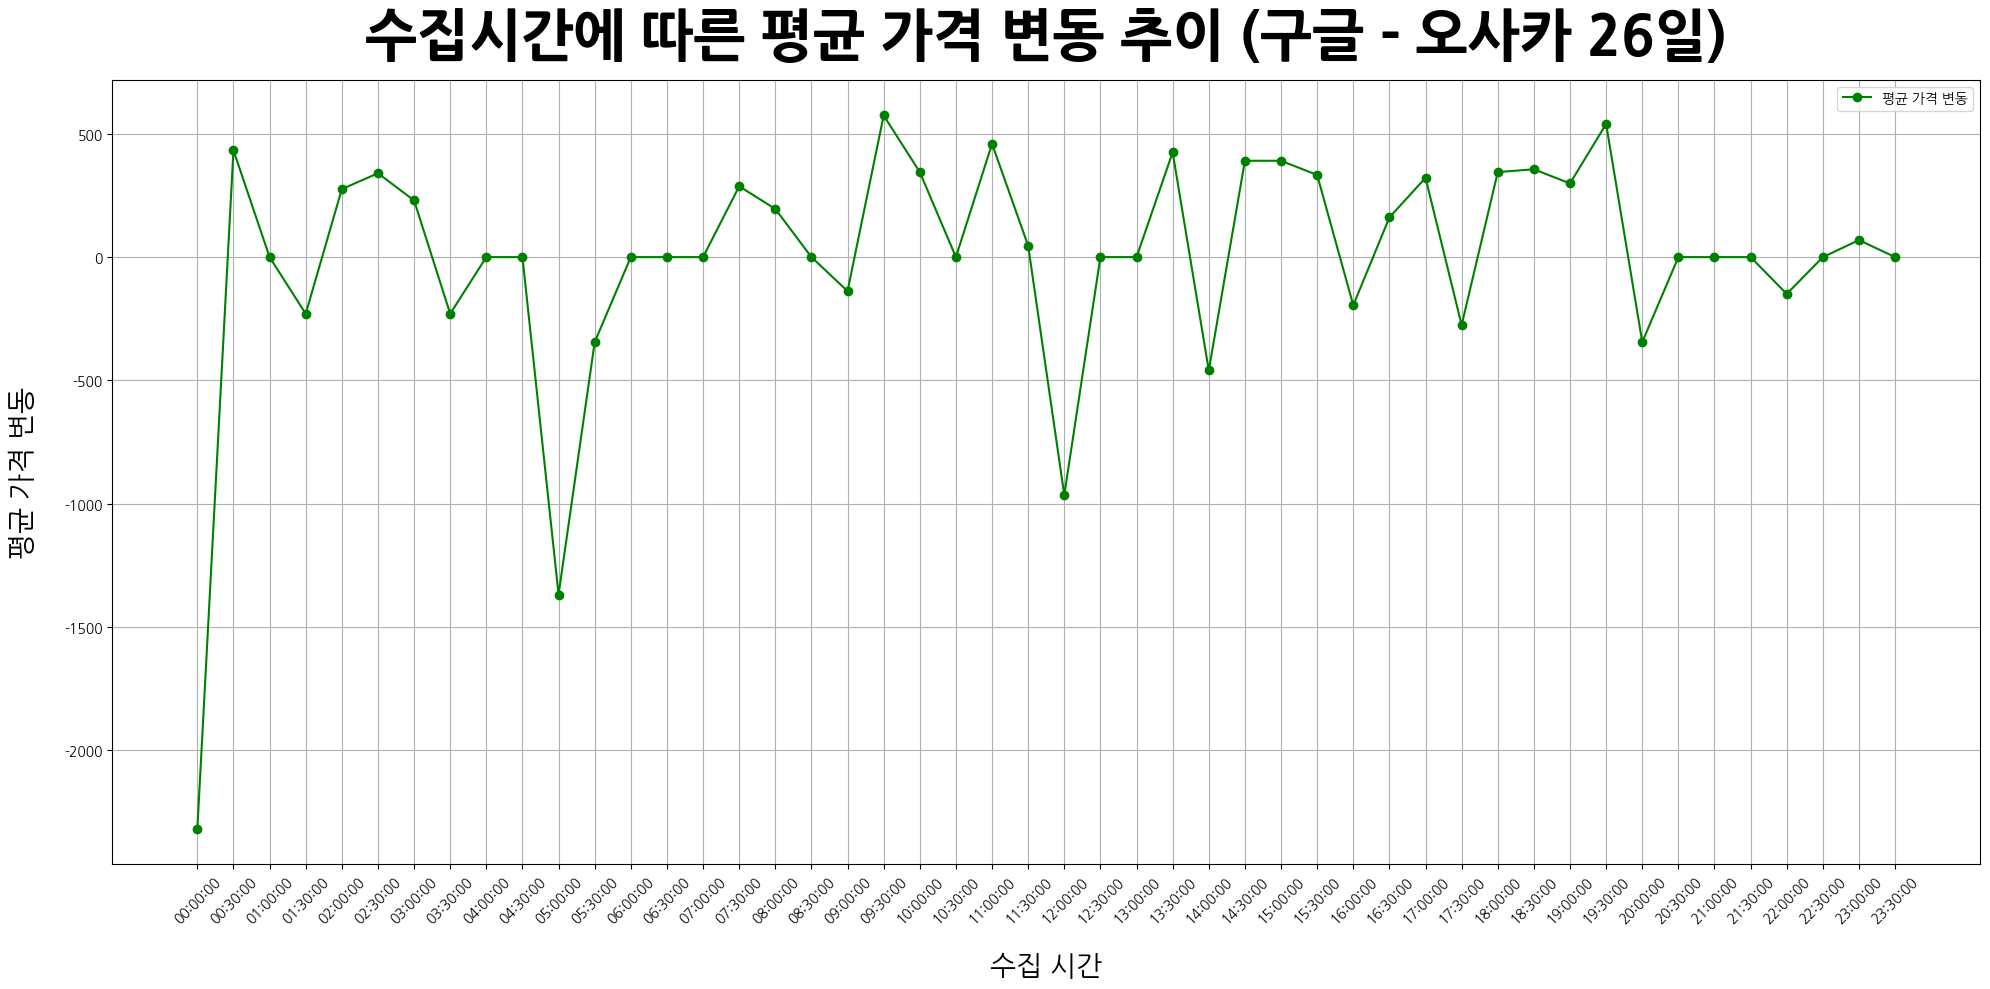

In [84]:
# 절대 가격 변동률 추이 그래프

plt.figure(figsize=(20, 10))
plt.plot(avg_price_change['추출시간'], avg_price_change['가격_변동'], marker='o', color='green', label='평균 가격 변동')
plt.xticks(rotation=45)
plt.title('수집시간에 따른 평균 가격 변동 추이 (구글 - 오사카 26일)', fontsize= 40, fontweight='bold', pad = 20)
plt.xlabel('수집 시간', fontsize= 20, labelpad=20)
plt.ylabel('평균 가격 변동', fontsize= 20, labelpad=20)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
